In [30]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from costs import *
from plots import *

%load_ext autoreload
%autoreload 2

ImportError: No module named 'costs'

# Least squares and linear basis functions models
## Least squares

In [31]:
def compute_cost_mse(y,tx,w):
    e=y-(tx @ w)
    return 1/2/y.shape[0]*(e @ e)
def compute_cost_rmse(y,tx,w):
    e=y-(tx @ w)
    return math.sqrt(1/y.shape[0]*(e @ e))


def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square: TODO
    # returns mse, and optimal weights
    # ***************************************************
    transpose = tx.T
    w = np.linalg.solve(np.dot(transpose,tx),np.dot(transpose,y))
    mse = compute_cost_mse(y,tx,w)
    return (mse,w)


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [32]:
from helpers import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    mse,w = least_squares(y,tx)
    print("-- With Least Squares : \nMSE = ",mse,"\nw = ",w)
    
    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    print("-- With Grid Search : \nMSE = ",loss_star,"\nw = ",[w0_star , w1_star])
    

test_your_least_squares()

-- With Least Squares : 
MSE =  15.3858878688 
w =  [ 73.293922    13.47971243]


NameError: name 'generate_w' is not defined

## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [33]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [34]:
def build_poly(x, degree):
    """polynomial basis function."""
    rx = x.reshape((-1,1))
    toReturn = np.ones((rx.shape[0],1))
    for i in range(degree):
        toReturn = np.hstack([toReturn,np.power(rx,i+1)])
    return toReturn



Let us play with polynomial regression. Note that we will use your implemented function `compute_cost`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.258582776677375
Processing 3th experiment, degree=7, rmse=0.24965870360907166
Processing 4th experiment, degree=12, rmse=0.24151773115041963


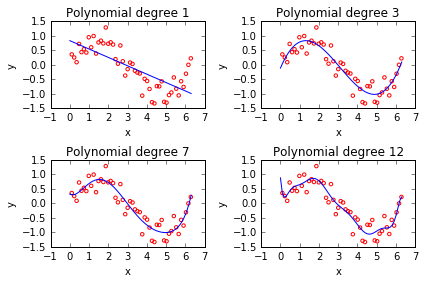

In [35]:
from plots import *

def polynomial_regression():
    """The entry."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        tx = build_poly(x,degree)
        mse,weight = least_squares(y,tx)
        rmse = compute_cost_rmse(y,tx,weight)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_row][ind % num_row])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [36]:
def split_data(x, y, ratio, seed=1):
    num_row = y.shape[0]
    interval = int(num_row*ratio)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    test_indices = indices[interval:]
    train_indices = indices[0:interval]
    return ((x[train_indices],y[train_indices]),(x[test_indices],y[test_indices]))

Then, test your `split_data` function below.

In [37]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    ((x_training,y_training),(x_testing,y_testing))= split_data(x, y,ratio,seed)
    
    tx_training = build_poly(x_training,degree)
    tx_testing = build_poly(x_testing,degree)
   
    mse_training,weight_training = least_squares(y_training,tx_training)
    rmse_tr = np.sqrt(2*mse_training)
    rmse_te = np.sqrt(2*compute_cost_mse(y_testing,tx_testing,weight_training))
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    print("\n")
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)



proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.251


proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.094


proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.022
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.741


# Ridge Regression
Please fill in the function below.

In [47]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    transpose = tx.T
    lambdaIden = lamb*2*tx.shape[0]*np.eye(tx.shape[1])
    LHS = np.dot(transpose,tx)+lambdaIden
    RHS = np.dot(transpose,y)
    beta = np.linalg.inv(LHS).dot(RHS)
    return beta

def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    return np.linalg.inv((tx.T @ tx)+lamb*np.identity(tx.shape[1])) @ tx.T @ y

def test_your_ridge_regression():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    mse,w = least_squares(y,tx)
    w_star = ridge_regression(y,tx,0.00)
    print("-- With Least Squares : \nw = ",w,"\nrmse = ",compute_cost_rmse(y,tx,w))
    print("-- With Ridge : \nw = ",w_star,"\nrmse = ",compute_cost_rmse(y,tx,w_star))
    
test_your_ridge_regression()

-- With Least Squares : 
w =  [ 73.293922    13.47971243] 
rmse =  5.547231357863019
-- With Ridge : 
w =  [ 73.293922    13.47971243] 
rmse =  5.547231357863019


In [48]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    ((x_training,y_training),(x_testing,y_testing)) = split_data(x, y, ratio,seed)
    tx_training = build_poly(x_training,degree)
    tx_testing = build_poly(x_testing,degree)
    rmses_tr = []
    rmses_te = []
    for lamb in lambdas:
        weight_training = ridge_regression(y_training, tx_training, lamb)
        rmses_tr.append(np.sqrt(2*compute_cost_mse(y_training,tx_training,weight_training)))
        rmses_te.append(np.sqrt(2*compute_cost_mse(y_testing,tx_testing,weight_training)))
    return rmses_tr,rmses_te



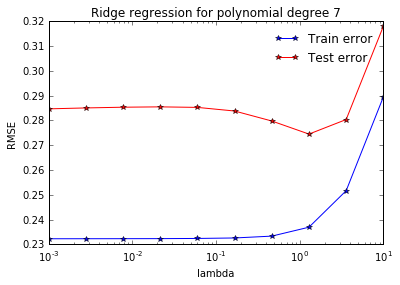

In [49]:
def plot_train_test(train_errors, test_errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(lambdas, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("ridge_regression")

seed = 6
degree = 7
split_ratio = 0.5
lambdas = np.logspace(-3, 1, 10)   
rmse_tr,rmse_te = ridge_regression_demo(x, y, degree, split_ratio, seed)
plot_train_test(rmse_tr, rmse_te, lambdas, degree)

In [45]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    (train_x,train_y),(test_x,test_y)=split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    train_tx=build_poly(train_x,degree)
    test_tx=build_poly(test_x,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    rmse_tr=[]
    rmse_te=[]
    for l in lambdas:
        weight = ridge_regression(train_y,train_tx,l)
        rmse_tr.append(compute_cost_rmse(train_y,train_tx,weight))
        rmse_te.append(compute_cost_rmse(test_y,test_tx,weight))
    print(rmse_tr)
    print(rmse_te)
    return(rmse_tr,rmse_te)
    plt.semilogx(lambdas, rmse_tr, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, rmse_te, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("ridge_regression")

    
seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

[0.23241236471251453, 0.23257249097124533, 0.2331411457407043, 0.23587084455350488, 0.24762636210204364, 0.28115575757529754, 0.33096908196785985, 0.37500154299373445, 0.41779484070283157, 0.468703061457881]
[0.28536648328817965, 0.2842295806484211, 0.2807110449161474, 0.2752201036158833, 0.27743628947720306, 0.3091320920674368, 0.3582525410061522, 0.37557732089778045, 0.3647822625744591, 0.3801458940759232]


([0.23241236471251453,
  0.23257249097124533,
  0.2331411457407043,
  0.23587084455350488,
  0.24762636210204364,
  0.28115575757529754,
  0.33096908196785985,
  0.37500154299373445,
  0.41779484070283157,
  0.468703061457881],
 [0.28536648328817965,
  0.2842295806484211,
  0.2807110449161474,
  0.2752201036158833,
  0.27743628947720306,
  0.3091320920674368,
  0.3582525410061522,
  0.37557732089778045,
  0.3647822625744591,
  0.3801458940759232])